Author - SAMAR PRAKASH
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
● As a business manager, try to find out the weak areas where you can
work to make more profit.
● What all business problems you can derive by exploring the data?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data

df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# depicts the datatypes and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# check the duplicates

df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace= True) #When inplace = True, the data is modified in place,which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.


In [8]:
# no. of observations
df.shape

(9994, 13)

In [9]:
# drop the unnecessary columns like ship mode which doesn't affect the sales and profit

df.drop(columns="Postal Code", axis=1, inplace=True)
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
core1 = df.corr()
core1

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

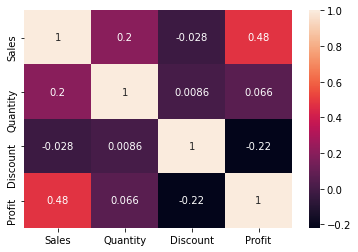

In [11]:
#heatmadiscount and profit to check the collinearity between sales, quantity, discount and profit

sns.heatmap(core1, annot=True)

In [54]:
#Comparison of sale of different states
State_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
State_sales

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

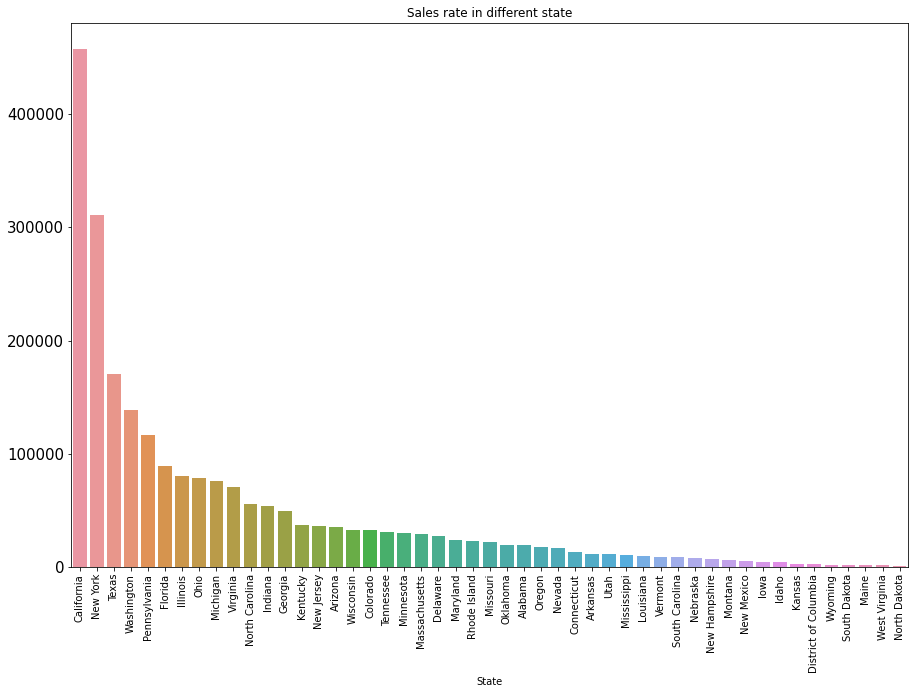

In [55]:
plt.figure(figsize=(15,10))
plt.title('Sales rate in different state')
sns.barplot(x = State_sales.index, y = State_sales.values) 
plt.xticks(rotation =90 , fontsize = 10)
plt.yticks(fontsize = 15)
plt.show()

California have highest sale and North Dakota have least sale. 

In [64]:
#Comparison of sale in different City
City_sales = df.groupby('City').sum()['Sales'].sort_values(ascending=False).reset_index()
#sorting the Cities by their profits in descending order(from highest to lowest profit.)
City_sales

,City,Sales
0,New York City,256368.161
1,Los Angeles,175851.341
2,Seattle,119540.742
3,San Francisco,112669.092
4,Philadelphia,109077.013
...,...,...
526,Ormond Beach,2.808
527,Pensacola,2.214
528,Jupiter,2.064
529,Elyria,1.824


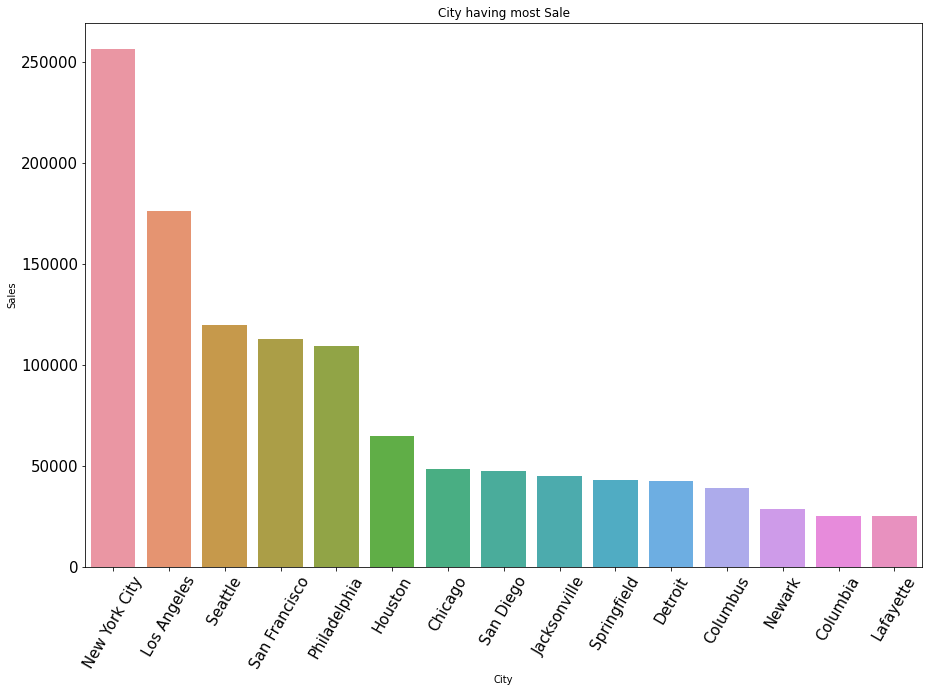

In [65]:
#City with highest sale
plt.figure(figsize=(15,10))
plt.title('City having most Sale')
sns.barplot(x = 'City',y = 'Sales',  data = City_sales.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.show()

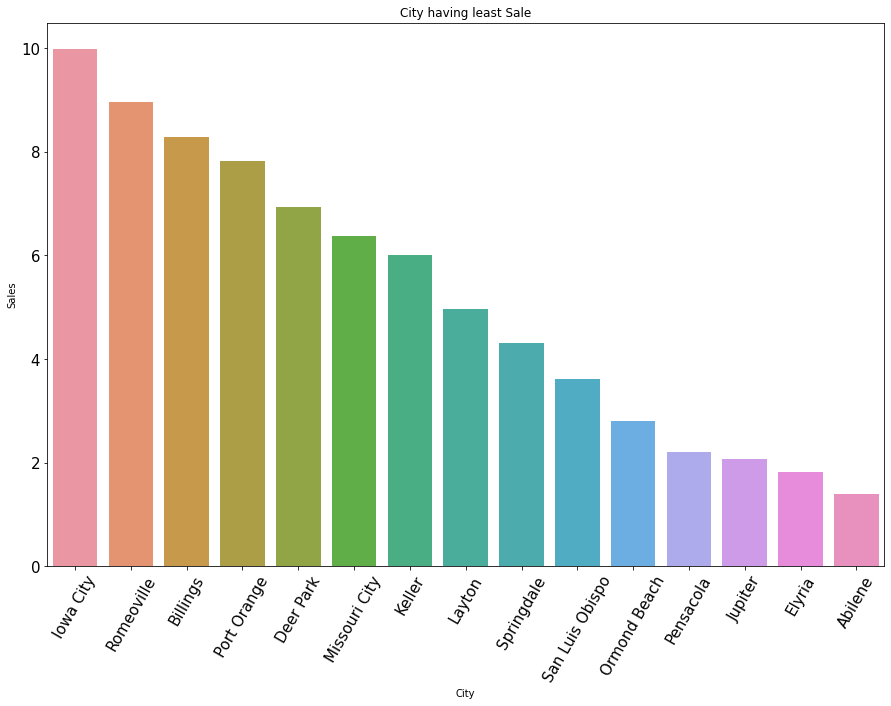

In [63]:
#City with lowest sale
plt.figure(figsize=(15,10))
plt.title('City having least Sale')
sns.barplot(x = 'City',y = 'Sales',  data = City_sales.tail(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.show()

New York City have highest sale and Abilene have lowest sale.

In [56]:
#finding the weak states where we can work to make more profit.
State_profit = df.groupby("State")["Profit"].sum().sort_values(ascending=False)
State_profit

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

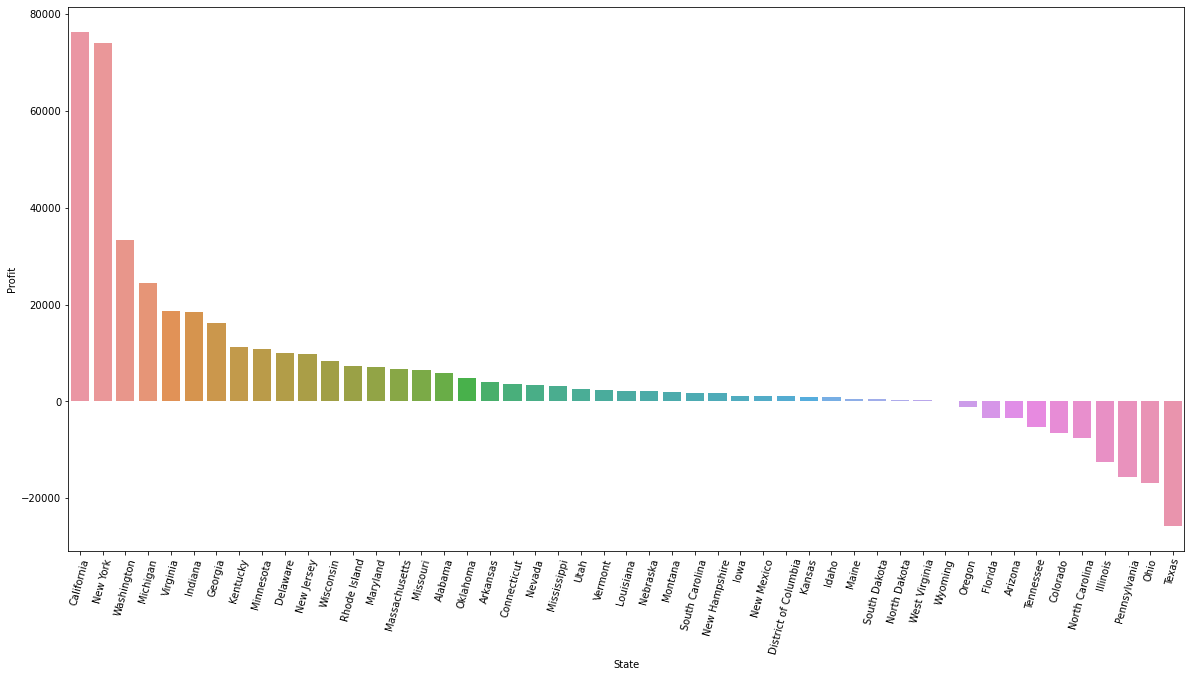

In [57]:
plt.figure(figsize = (20,10))
sns.barplot(x=State_profit.index, y=State_profit.values)
plt.ylabel("Profit")
plt.xticks(rotation=75) #This will make name of each state vertical.
plt.show()

State with low profit or loss are the eak areas where there is chance to make profit in future by giving extra focus.
California have highest profit and Texas have highest loss.

In [36]:
City_profit = df.groupby('City').sum()['Profit'].sort_values(ascending=False).reset_index()
#sorting the Cities by their profits in descending order(from highest to lowest profit.)
City_profit

,City,Profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
...,...,...
526,Chicago,-6654.5688
527,Lancaster,-7239.0684
528,San Antonio,-7299.0502
529,Houston,-10153.5485


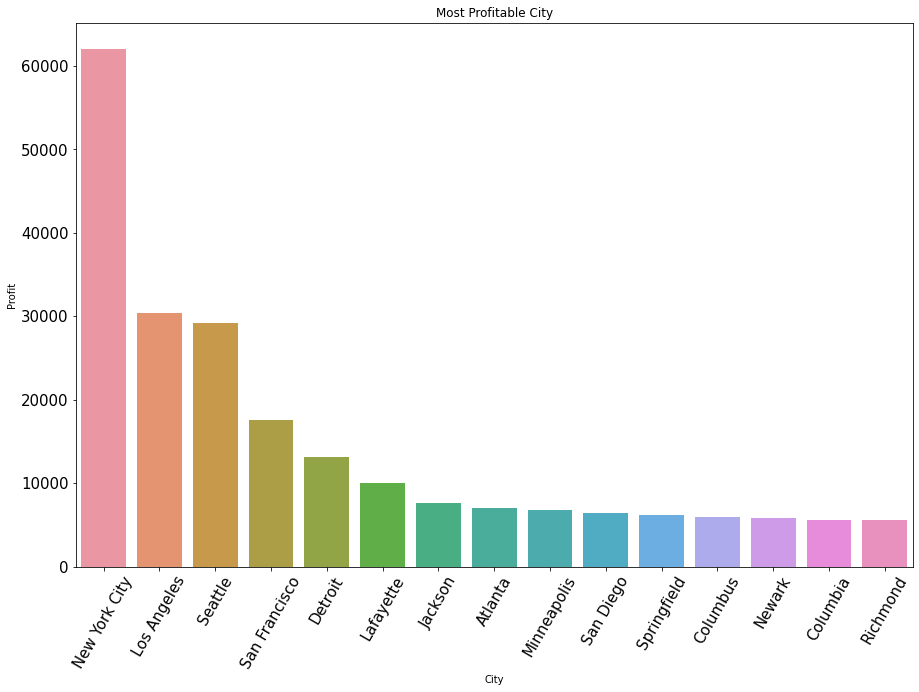

In [37]:
#City with highest profit
plt.figure(figsize=(15,10))
plt.title('Most Profitable City')
sns.barplot(x = 'City',y = 'Profit', data = City_profit.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.show()

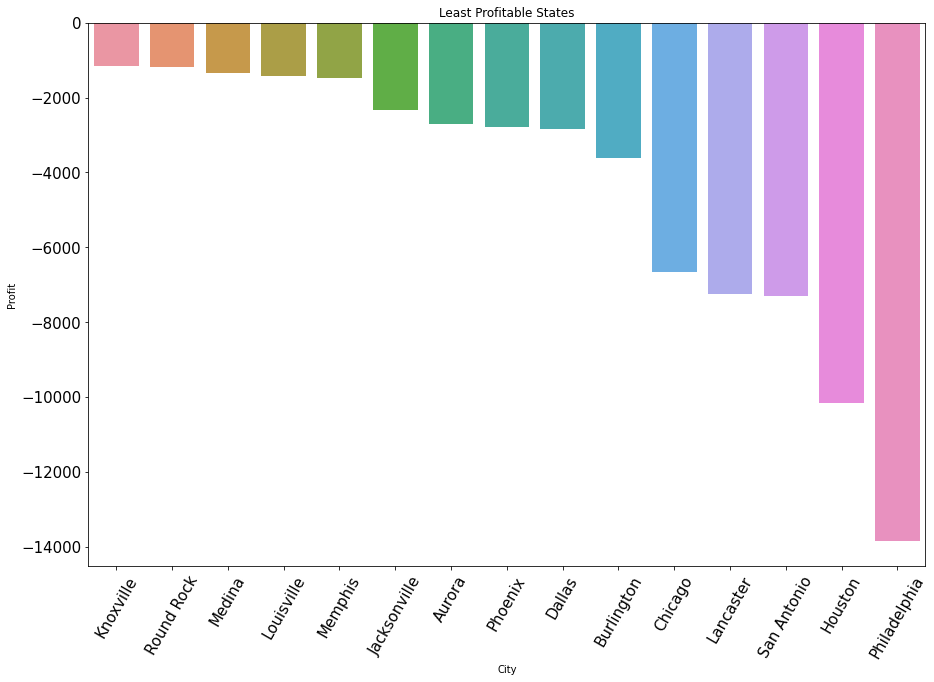

In [38]:
#State with lowest profit or highest loss.
plt.figure(figsize=(15,10))
plt.title('Least Profitable States')
sns.barplot(x = 'City',y = 'Profit', data = City_profit.tail(15)) #printing 15 lowest profitable states
plt.xticks(rotation = 60 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

New York City has the highest profit and Philadelphia have highest loss.

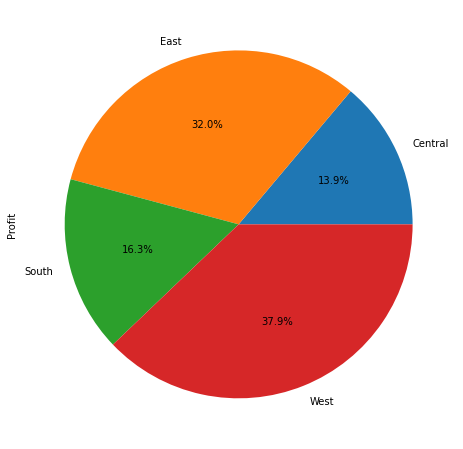

In [67]:
plt.figure(figsize=(8,8))
df.groupby('Region')['Profit'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Insight: Central region is the lowest in terms of its contribution to the profit percentage. reson behind this should be analysed.

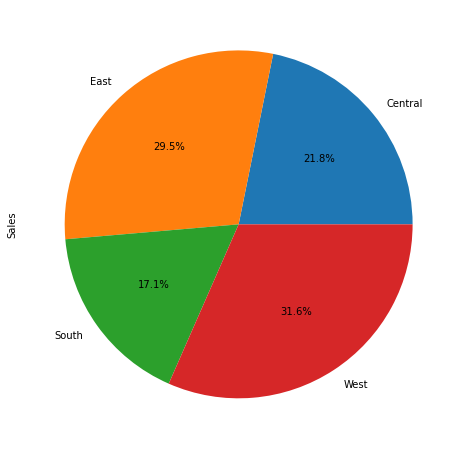

In [68]:
plt.figure(figsize=(8,8))
df.groupby('Region')['Sales'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Insight: South region is the lowest in terms of its contribution to the Sale percentage. 

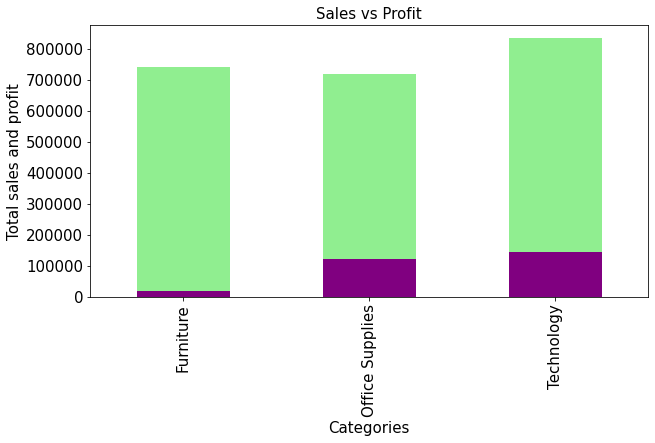

In [80]:
#Sale vs Profit among different Category
Sales = df.groupby('Category').sum()['Sales']
Profits = df.groupby('Category').sum()['Profit']
# plt.style.use('seaborn')
Sales.plot(kind='bar', figsize=(10,5),fontsize = 15, color = 'lightgreen')
Profits.plot(kind='bar', figsize=(10,5),fontsize = 15 , color='Purple')
plt.xlabel('Categories',fontsize = 15)
plt.ylabel('Total sales and profit',fontsize = 15)
plt.title("Sales vs Profit",fontsize = 15)
plt.show()

conclusion of the above plot is that there is low profit in Furniture subcategory.

<AxesSubplot:xlabel='Sub-Category'>

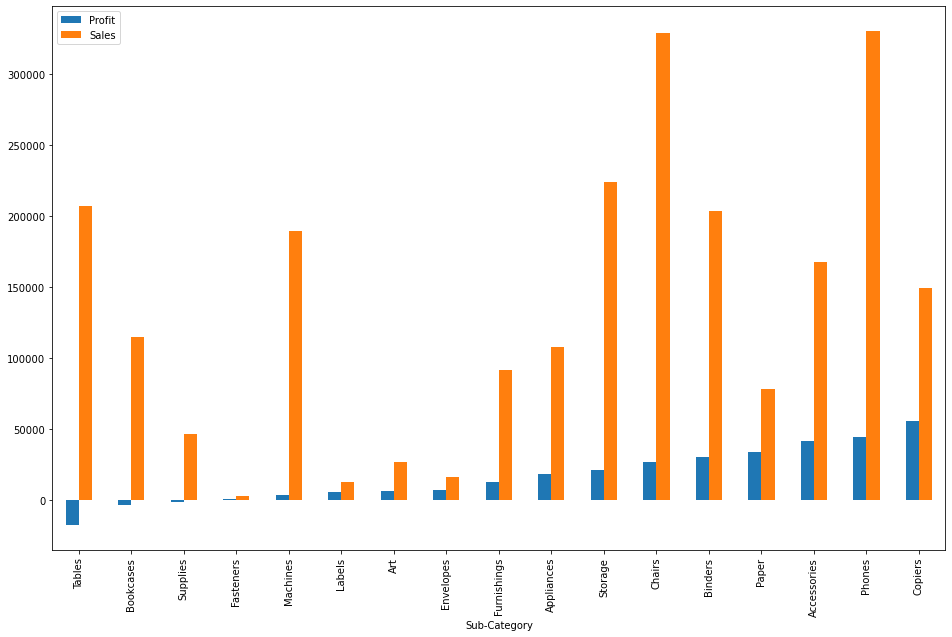

In [78]:
#Sales vs Profit among Different sub Categories
subcategory_grpby=df.groupby(by="Sub-Category")[['Profit','Sales']].sum()
subprofit=subcategory_grpby.sort_values(by=['Profit'],ascending=True)
subprofit.plot(kind='bar',figsize=(16,10))

#Reason behind less profit or loss in items like Tables, BookCases, Machines although after good sale should be figured out.
#Reason of low sale of subcategories like Fateners, Labels, Art, Envelopes should be analysed and every posssible measures should be taken to increase their Sale.